## k-means cluster of volunteer profiles

In [55]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [56]:
df = pd.read_csv('volunteerNew.csv')

In [57]:
# remove the first column
df = df.iloc[:,1:]

In [58]:
#Make a copy of DF
df_tr = df

In [59]:
# list of columns
clmns = ['Distance', 'Tenure', 'Student', 'Hours Volunteered in 2015',
       'Employed', 'Retired', 'Student.1', 'English Only']

### Standardize the data

In [60]:
df_tr_std = stats.zscore(df_tr[clmns])

### Cluster data

In [61]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [62]:
#Glue back to original data
df_tr['clusters'] = labels

In [63]:
#Add the column into our list
clmns.extend(['clusters'])


### Analysis

In [64]:
#Lets analyze the clusters

In [65]:
# Let's look at the mean's of column by cluster
df_tr[clmns].groupby(['clusters']).mean()

,Distance,Tenure,Student,Hours Volunteered in 2015,Employed,Retired,Student.1,English Only
clusters,,,,,,,,
0,10.465270,2.115727,0.0,20.015579,0.744807,0.065282,0.0,0.816024
1,15.363302,1.228774,1.0,8.829009,0.000000,0.000000,1.0,0.752358


We can see that cluster 0 and 1 differ in that cluster 0 has a much higher <br>
hours volunteers, and are less likely to be a student, as well as greater tenure.

### Visualize clusters

It's tricky of course to visualize anything above 2 dimensions so I made a <br>
pair plot of a few of the features and colored the dots according to their cluster.<br>

In this way we can see some of the cluster differences.

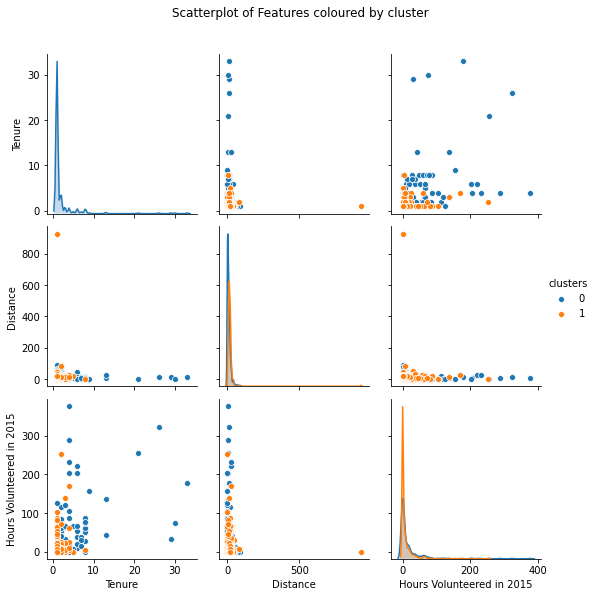

In [50]:
g = sns.pairplot(df_tr[['Tenure','Distance','Hours Volunteered in 2015','clusters']], hue="clusters");
g.fig.suptitle("Scatterplot of Features coloured by cluster", y=1.08);